# Metrics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import mglearn
import pandas as pd
from sklearn.datasets import load_iris,make_moons,make_blobs,make_regression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report,mean_squared_error,r2_score)

### Part 1: Regression

A simple linear regression problem:

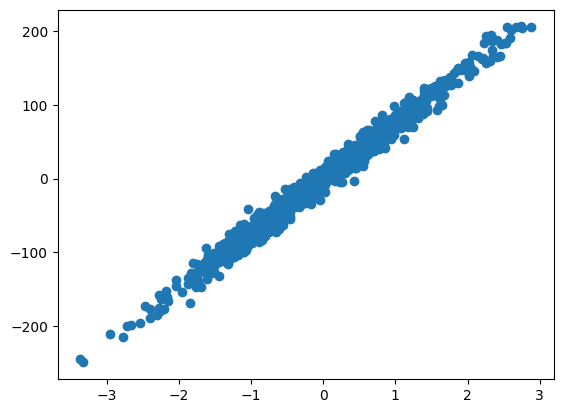

In [3]:
X,y=make_regression(n_samples=1000, n_features=1,noise=10.0)

plt.scatter(X,y)
plt.show()

In [4]:
model=LinearRegression().fit(X,y)

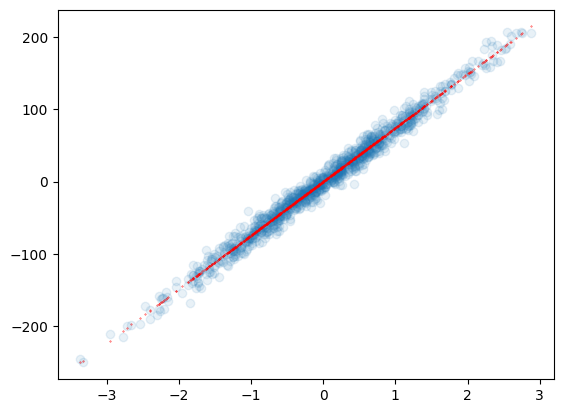

In [5]:
y_pred=model.predict(X)

plt.scatter(X,y,alpha=0.1)
plt.scatter(X,y_pred,color='red',s=0.1)
plt.show()

In [6]:
print("Mean squared error: {}".format(mean_squared_error(y,y_pred)))
print("R2 score: {}".format(r2_score(y,y_pred)))

Mean squared error: 92.53431074767744
R2 score: 0.9836305552689315


Rescaling the data:

In [7]:
y=0.01*y

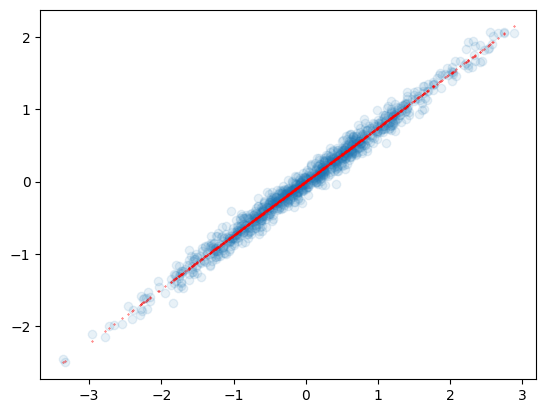

In [8]:
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

plt.scatter(X,y,alpha=0.1)
plt.scatter(X,y_pred,color='red',s=0.1)
plt.show()

In [9]:
print("Mean squared error: {}".format(mean_squared_error(y,y_pred)))
print("R2 score: {}".format(r2_score(y,y_pred)))

Mean squared error: 0.009253431074767744
R2 score: 0.9836305552689315


### Part 2: Binary Classification

We use the synthetic 'moons' data:

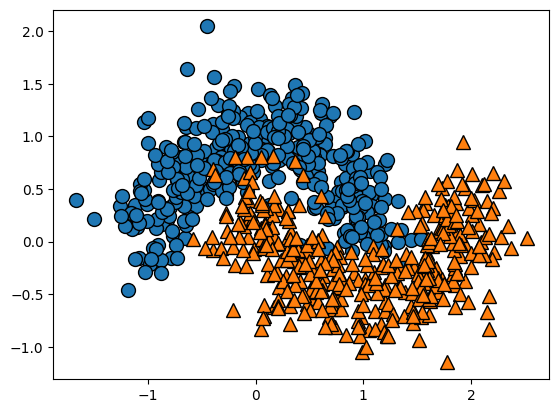

In [10]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

We look at the performance of SVM classifiers

In [11]:
kernel_svm = SVC(kernel='rbf', gamma=0.1).fit(X_train,y_train)
predictions = kernel_svm.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))


Confusion matrix:  
[[109  16]
 [ 18 107]]

Precision: 
0.8699186991869918

Recall: 
0.856

F1: 
0.8629032258064516


Now looking at the ROC curve:

Area under curve: 
0.941952


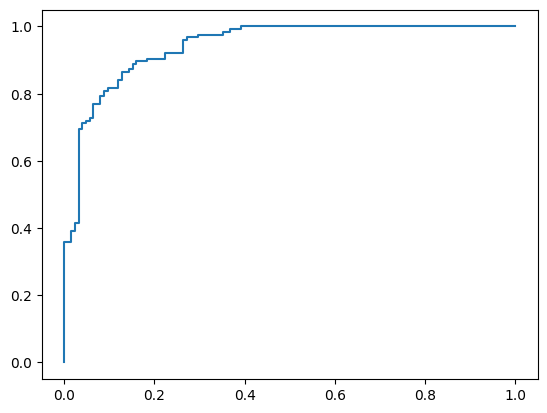

In [12]:
fprSVM,tprSVM,thresh = roc_curve(y_test,kernel_svm.decision_function(X_test))
plt.plot(fprSVM,tprSVM)
print("Area under curve: \n{}".format(roc_auc_score(y_test,kernel_svm.decision_function(X_test))) )

**Exercise:** try some other classifier(s) on this dataset, and compare their ROC-curves. Do you find a classifier that strictly dominates  another in the sense that its ROC curve is always above the other?

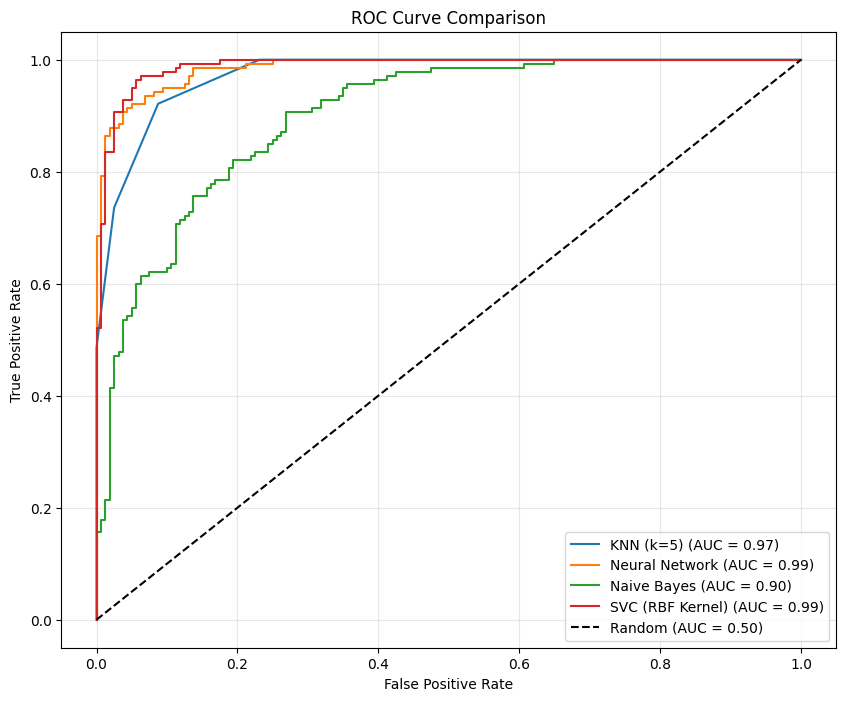

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for models like SVC and Neural Network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVC (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    # Get probabilities for the positive class
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
    else:
        # Some classifiers (e.g., SVC) use decision_function instead of predict_proba
        y_prob = clf.decision_function(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")

# Customize the plot
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


###  Part 3: Multiclass Metrics

Constructing the confusion matrix from the slides from imaginary true and predicted label arrays:

In [18]:
truelabels = np.arange(220)
truelabels[0:100]=1
truelabels[100:110]=2
truelabels[110:120]=3
truelabels[120:220]=4
predlabels = np.arange(220)
predlabels[0:89]=1
predlabels[89:93]=2
predlabels[93:97]=3
predlabels[97:100]=4
predlabels[100:103]=2
predlabels[103:106]=3
predlabels[106:110]=4
predlabels[110:112]=1
predlabels[112:120]=3
predlabels[120:121]=1
predlabels[121:122]=3
predlabels[122:220]=4

In [19]:
print("Confusion matrix:  \n{}\n".format(confusion_matrix(truelabels,predlabels)))
print("Accuracy: \n{}\n".format(accuracy_score(truelabels,predlabels)))

Confusion matrix:  
[[89  4  4  3]
 [ 0  3  3  4]
 [ 2  0  8  0]
 [ 1  0  1 98]]

Accuracy: 
0.9



Now let's look at the averaged binary scores:



In [20]:
print("One-vs-all measures: \n{}\n".format(classification_report(truelabels,predlabels)))
print("Macro average F1: \n{}\n".format(f1_score(truelabels,predlabels,average='macro')))
print("Micro average F1: \n{}\n".format(f1_score(truelabels,predlabels,average='micro')))

One-vs-all measures: 
              precision    recall  f1-score   support

           1       0.97      0.89      0.93       100
           2       0.43      0.30      0.35        10
           3       0.50      0.80      0.62        10
           4       0.93      0.98      0.96       100

    accuracy                           0.90       220
   macro avg       0.71      0.74      0.71       220
weighted avg       0.91      0.90      0.90       220


Macro average F1: 
0.7128766715410366

Micro average F1: 
0.9



### Part 4 Calibration

We use a fairly big sample from the make_moons data generator:

In [ ]:
X, y = make_moons(n_samples=30000, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, random_state=42)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

Learn a Naive Bayes and a Neural network model:

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[10],activation='tanh',solver='lbfgs', max_iter=2000, random_state=0).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Construct histograms showing the distribution of probability predictions for the positive class. Histograms that are more concentrated at the extreme ends represent classifiers that are more 'confident' in their predictions

In [ ]:
#print(mlp.predict_proba(X_test))
nnposprobas=mlp.predict_proba(X_test)[:,1]
nbposprobas=nb.predict_proba(X_test)[:,1]
pddf = pd.DataFrame({'NN' : nnposprobas, 'NB' : nbposprobas})
pddf.plot.hist(bins=20,alpha=0.4)
plt.show()

This distribution says nothing about calibration. For that we create a graph that plots the value *b* of the predicted probability for the positive class against the ratio of actually positive datapoints in the small interval (*b*,*b+binwidth*). We also plot a relative measure for how many datapoints fall into each bin.

In [ ]:
posprobas=nbposprobas
posprobas=nnposprobas


binwidth=0.05
bins = np.arange(0,1,binwidth)

for posprobas,label in zip( (nbposprobas,nnposprobas),("Naive Bayes","Neural Net")  ):
    predperc = np.zeros(bins.size)
    binexamples = np.zeros(bins.size)
    
    for i,b in enumerate(bins):
        preds = y_test[(posprobas >= b) & (posprobas < b+binwidth) ]
        predperc[i] = np.sum(preds)/preds.size
        binexamples[i]=preds.size
        
    binexamples*=1/np.max(binexamples)
        
    plt.plot(bins,predperc,label="Pos. ratio "+label)
    plt.plot(bins,binexamples,label="Num.pred. "+label)
plt.plot(bins,bins)
plt.legend()
plt.show()

We see that both naive Bayes and neural network here are fairly well calibrated. Due to the relatively small number of cases with predicted probabilities in the middle range, there are some fluctuations in the positive ratios here.